In [1]:
# Importación de librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el archivo limpio
file_path = '../data/silver/ExporteCOL2022_2023_2024_clean.csv'
df = pd.read_csv(file_path)

# Mostrar las primeras filas para revisar la estructura
print(df.head())

# Resumen estadístico de las variables numéricas
print(df.describe())

    Año  Mes         Uen               Regional  \
0  2022    1  DECORATIVO  REGIONAL BARRANQUILLA   
1  2022    1  DECORATIVO  REGIONAL BARRANQUILLA   
2  2022    1  DECORATIVO  REGIONAL BARRANQUILLA   
3  2022    1  DECORATIVO  REGIONAL BARRANQUILLA   
4  2022    1  DECORATIVO  REGIONAL BARRANQUILLA   

                 Canal Comercial  Marquilla  Código Producto  \
0  Cadenas y Grandes Superficies  AEROCOLOR         10228936   
1  Cadenas y Grandes Superficies  AEROCOLOR         10283186   
2  Cadenas y Grandes Superficies  AEROCOLOR         10283187   
3  Cadenas y Grandes Superficies  AEROCOLOR         10283188   
4  Cadenas y Grandes Superficies  AEROCOLOR         10283190   

                                            Producto  Numérica Clientes  \
0  LACA NEGRO MATE AEROCOLOR AEROSOLES 125012-801...                  1   
1   LACA BLANCO BRILLANTE AEROCOLOR AEROSOLES 300 ML                  2   
2  LACA TRANSPARENTE BRILLANTE AEROCOLOR AEROSOLE...                  1   
3       

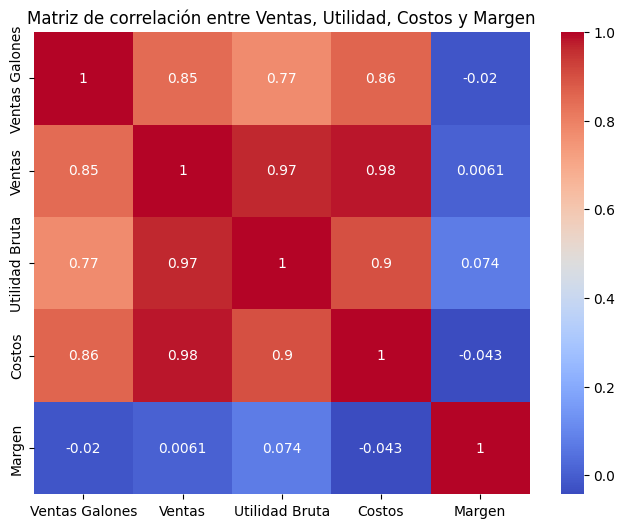

In [3]:
# Matriz de correlación
correlation_matrix = df[['Ventas Galones', 'Ventas', 'Utilidad Bruta', 'Costos', 'Margen']].corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre Ventas, Utilidad, Costos y Margen')
plt.show()

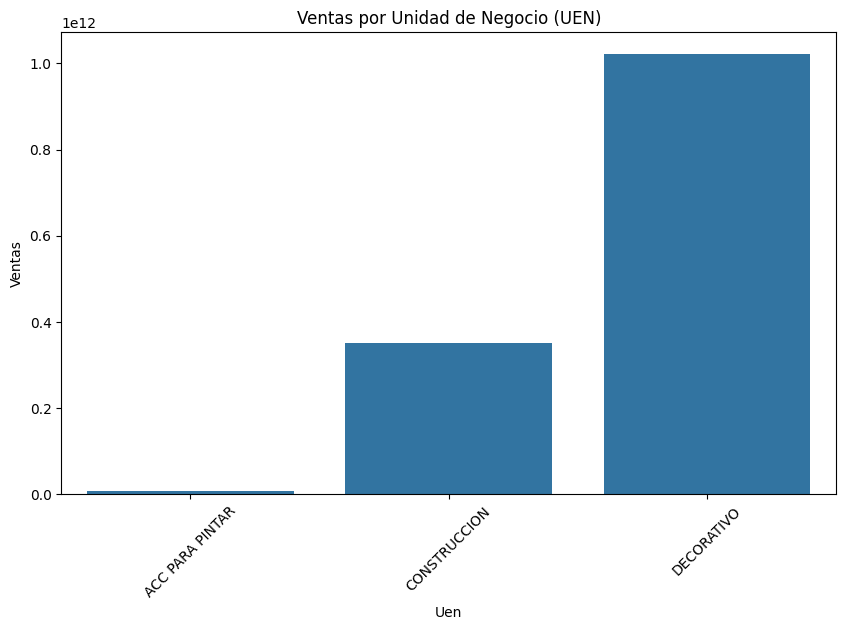

In [4]:
# Ventas por UEN
ventas_por_uen = df.groupby('Uen')['Ventas'].sum().reset_index()

# Visualización de las ventas por UEN
plt.figure(figsize=(10, 6))
sns.barplot(x='Uen', y='Ventas', data=ventas_por_uen)
plt.title('Ventas por Unidad de Negocio (UEN)')
plt.xticks(rotation=45)
plt.show()

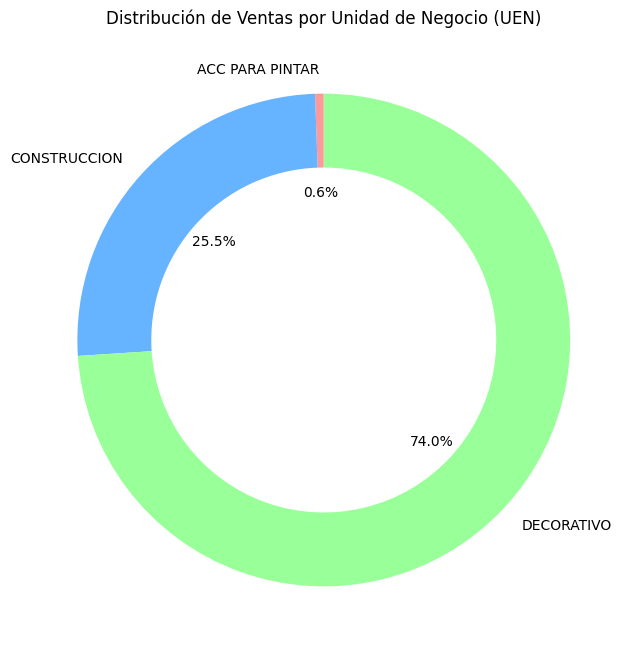

In [5]:


# Sumar las ventas por Unidad de Negocio (UEN)
ventas_por_uen = df.groupby('Uen')['Ventas'].sum().reset_index()

# Crear gráfico de pastel (pie chart)
plt.figure(figsize=(8, 8))
plt.pie(ventas_por_uen['Ventas'], labels=ventas_por_uen['Uen'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'], wedgeprops=dict(width=0.3))
plt.title('Distribución de Ventas por Unidad de Negocio (UEN)')
plt.show()


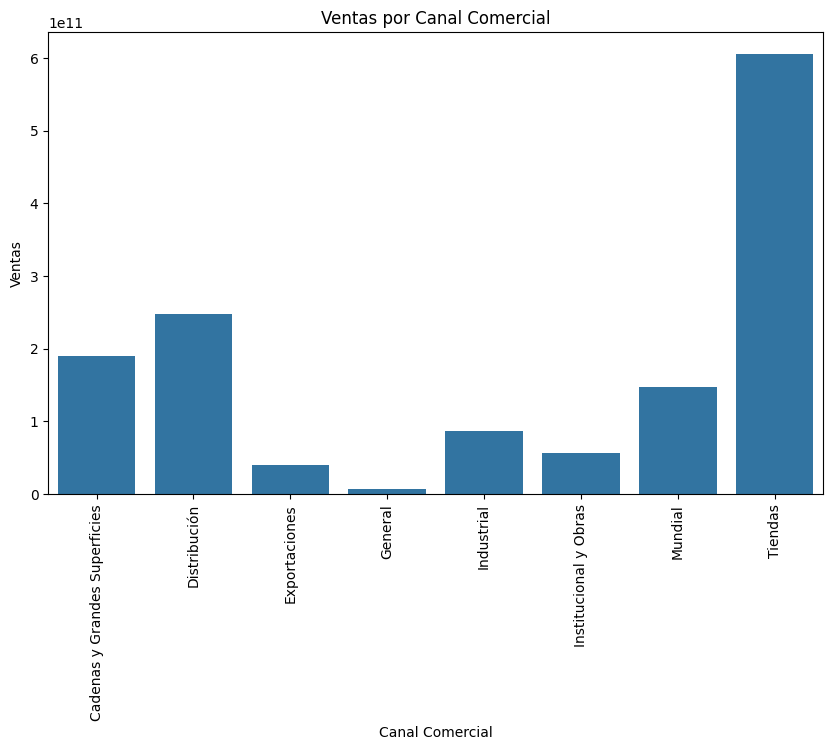

In [6]:
# Sumar las ventas por Canal Comercial
ventas_por_canal = df.groupby('Canal Comercial')['Ventas'].sum().reset_index()

# Visualización de las ventas por Canal Comercial
plt.figure(figsize=(10, 6))
sns.barplot(x='Canal Comercial', y='Ventas', data=ventas_por_canal)
plt.title('Ventas por Canal Comercial')
plt.xticks(rotation=90)
plt.show()


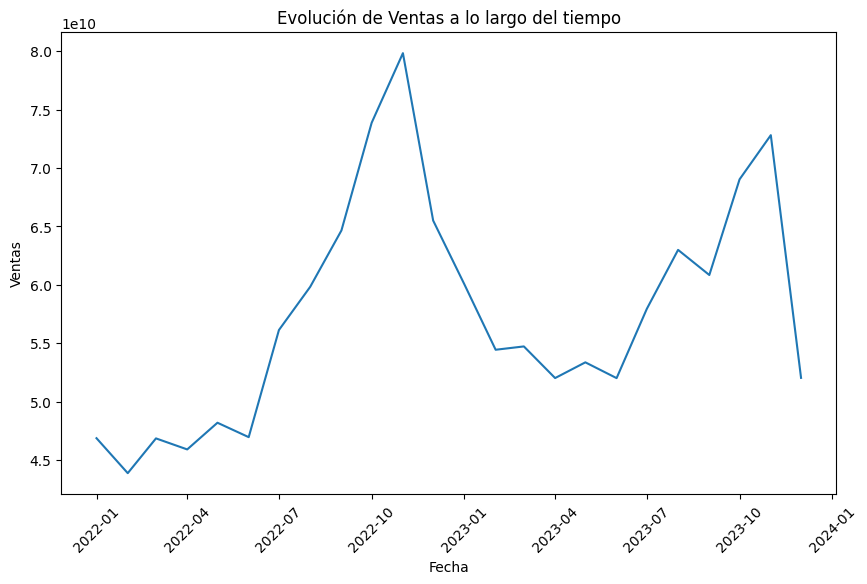

In [7]:
# Ventas por mes y año
df['Fecha'] = pd.to_datetime(df['Año'].astype(str) + '-' + df['Mes'].astype(str), format='%Y-%m')
ventas_por_mes = df.groupby('Fecha')['Ventas'].sum().reset_index()

# Visualización de la evolución de ventas a lo largo del tiempo
plt.figure(figsize=(10, 6))
sns.lineplot(x='Fecha', y='Ventas', data=ventas_por_mes)
plt.title('Evolución de Ventas a lo largo del tiempo')
plt.xticks(rotation=45)
plt.show()

       Ventas Galones        Ventas  Utilidad Bruta        Costos  \
count   317471.000000  3.174710e+05    3.174710e+05  3.174710e+05   
mean       108.351203  4.349158e+06    1.835911e+06  2.513246e+06   
std        593.385565  1.745636e+07    7.515483e+06  1.038517e+07   
min          0.000000  1.000000e+00    4.451140e-02  0.000000e+00   
25%          2.250000  2.092280e+05    8.033503e+04  1.183058e+05   
50%         10.000000  6.697310e+05    2.637308e+05  3.819490e+05   
75%         44.000000  2.495796e+06    9.979212e+05  1.425177e+06   
max      37975.406330  8.147348e+08    3.978505e+08  5.053644e+08   

             Margen  
count  3.174710e+05  
mean   4.187976e-01  
std    1.366642e-01  
min    1.378020e-07  
25%    3.247026e-01  
50%    4.228248e-01  
75%    5.176792e-01  
max    1.000000e+00  


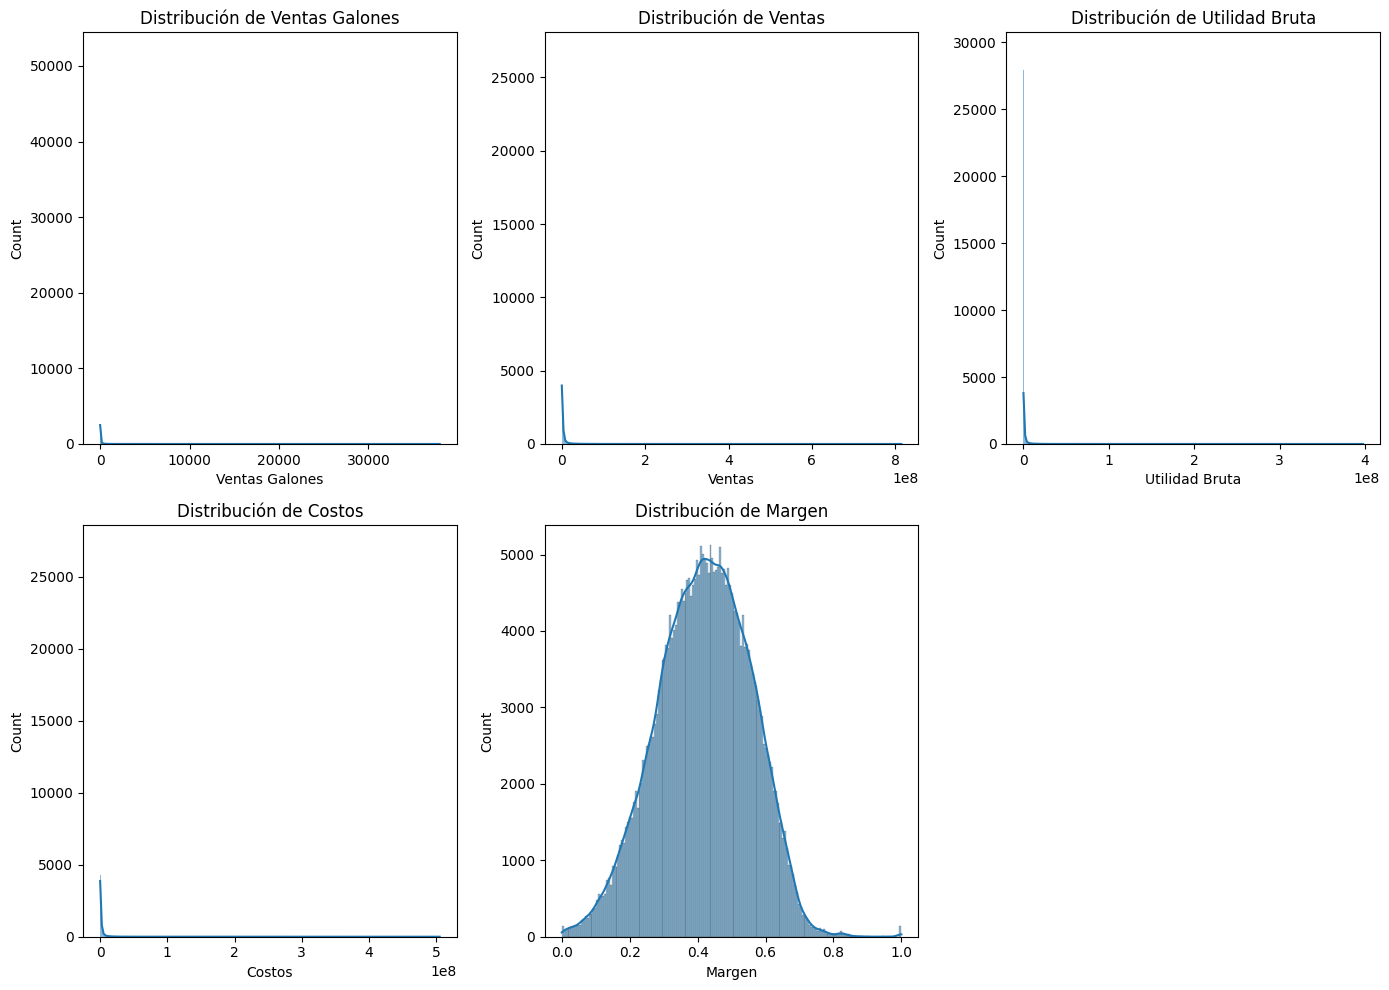

,Ventas Galones,Ventas,Utilidad Bruta,Costos,Margen
count,317471.00,317471.00,317471.00,317471.00,317471.00
mean,108.35,4349157.82,1835911.38,2513246.44,0.42
std,593.39,17456364.83,7515482.80,10385171.01,0.14
min,0.00,1.00,0.04,0.00,0.00
25%,2.25,209228.00,80335.03,118305.75,0.32
50%,10.00,669731.00,263730.81,381949.03,0.42
75%,44.00,2495796.00,997921.18,1425176.66,0.52
max,37975.41,814734846.00,397850492.80,505364422.40,1.00


In [8]:
# Seleccionar las columnas relevantes para el resumen estadístico
columns_of_interest = ['Ventas Galones','Ventas', 'Utilidad Bruta', 'Costos', 'Margen']

# Generar el resumen estadístico de las columnas seleccionadas
summary_statistics = df[columns_of_interest].describe()

# Mostrar el resumen estadístico
print(summary_statistics)

# Visualización de las distribuciones para las variables de interés
plt.figure(figsize=(14, 10))

for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribución de {column}')
    
plt.tight_layout()
plt.show()# Mostrar la tabla con estilo en el notebook
summary_styled = summary_statistics.style.format("{:.2f}").background_gradient(cmap='coolwarm')
summary_styled

In [9]:
df.head()

,Año,Mes,Uen,Regional,Canal Comercial,Marquilla,Código Producto,Producto,Numérica Clientes,Numérica Documentos,Ventas Galones,Ventas,Utilidad Bruta,Costos,Margen,Fecha
0,2022,1,DECORATIVO,REGIONAL BARRANQUILLA,Cadenas y Grandes Superficies,AEROCOLOR,10228936,LACA NEGRO MATE AEROCOLOR AEROSOLES 125012-801...,1,1,1.268499,129780.0,66754.53069,6.302547e+04,0.514367,2022-01-01
1,2022,1,DECORATIVO,REGIONAL BARRANQUILLA,Cadenas y Grandes Superficies,AEROCOLOR,10283186,LACA BLANCO BRILLANTE AEROCOLOR AEROSOLES 300 ML,2,11,20.919176,1605228.0,431180.39710,1.174048e+06,0.268610,2022-01-01
2,2022,1,DECORATIVO,REGIONAL BARRANQUILLA,Cadenas y Grandes Superficies,AEROCOLOR,10283187,LACA TRANSPARENTE BRILLANTE AEROCOLOR AEROSOLE...,1,1,0.950872,93600.0,40977.03571,5.262296e+04,0.437789,2022-01-01
3,2022,1,DECORATIVO,REGIONAL BARRANQUILLA,Cadenas y Grandes Superficies,AEROCOLOR,10283188,LACA NEGRO MATE AEROCOLOR AEROSOLES 300 ML,1,13,25.673534,1897920.0,419250.64040,1.478669e+06,0.220900,2022-01-01
4,2022,1,DECORATIVO,REGIONAL BARRANQUILLA,Cadenas y Grandes Superficies,AEROCOLOR,10283190,LACA ALUMINIO BRILLANTE AEROCOLOR AEROSOLES 30...,2,11,13.312203,1039068.0,239438.79160,7.996292e+05,0.230436,2022-01-01


C:\Users\camil\AppData\Local\Temp\ipykernel_26952\3861610656.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ventas_por_mes = df.groupby('Mes').apply(lambda x:remover_outliers(x,"Ventas")).reset_index(drop=True)


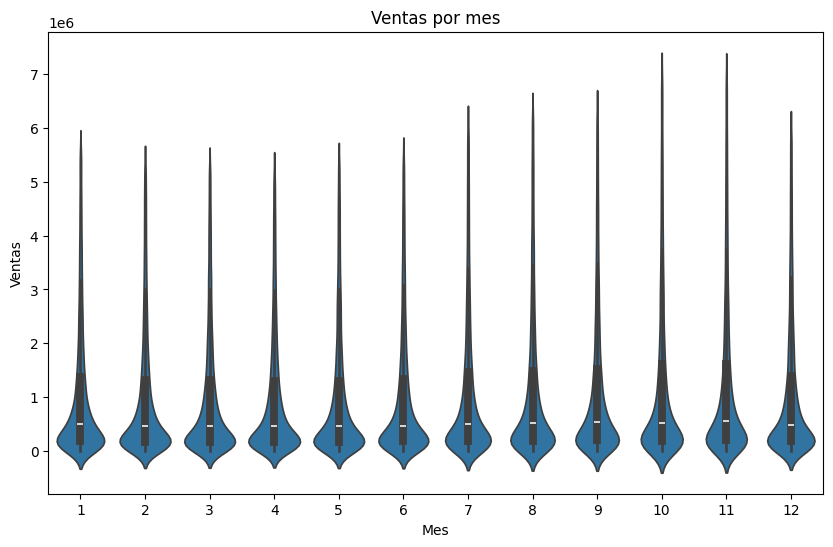

In [22]:
# Crear función para remover los outliers
def remover_outliers(df, column):
    """
    Filtra los outliers de una columna usando el método del IQR.
    
    Args:
        df (pd.DataFrame): DataFrame con los datos.
        column (str): Nombre de la columna a filtrar.
    
    Returns:
        pd.DataFrame: DataFrame sin outliers.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Ventas por mes
ventas_por_mes = df.groupby('Mes').apply(lambda x:remover_outliers(x,"Ventas")).reset_index(drop=True)

# Visualización de las ventas por Umes
plt.figure(figsize=(10, 6))
sns.violinplot(x='Mes', y='Ventas', data=ventas_por_mes)
plt.title('Ventas por mes')
plt.show()

C:\Users\camil\AppData\Local\Temp\ipykernel_26952\897161279.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ventas_por_regional = df.groupby('Regional').apply(lambda x:remover_outliers(x,"Ventas")).reset_index(drop=True)


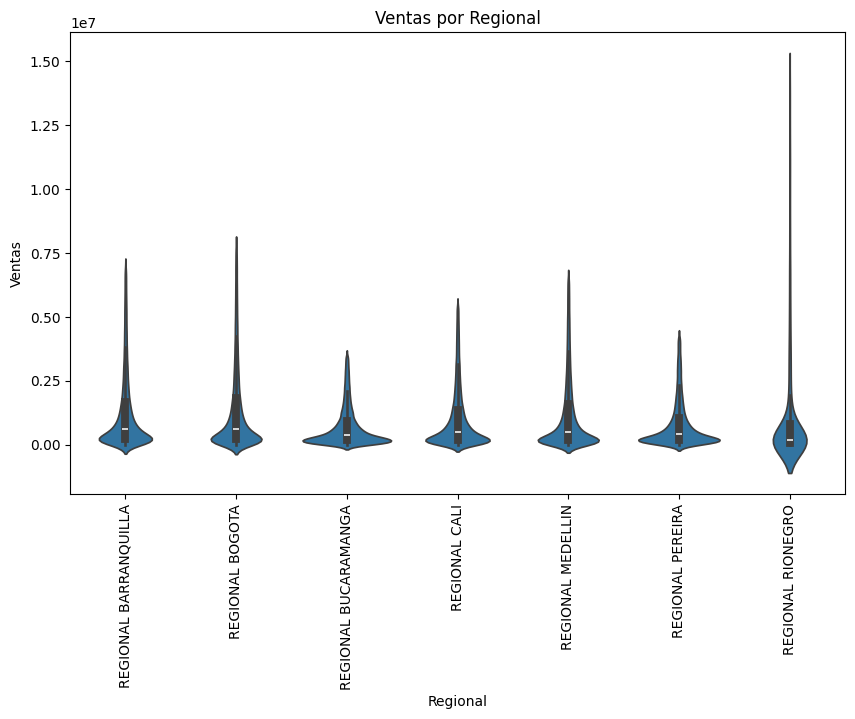

In [23]:
# Ventas por regional
ventas_por_regional = df.groupby('Regional').apply(lambda x:remover_outliers(x,"Ventas")).reset_index(drop=True)

# Visualización de las ventas por Umes
plt.figure(figsize=(10, 6))
sns.violinplot(x='Regional', y='Ventas', data=ventas_por_regional)
plt.title('Ventas por Regional')
plt.xticks(rotation=90)
plt.show()

C:\Users\camil\AppData\Local\Temp\ipykernel_26952\4028892168.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ventas_por_canal = df.groupby('Canal Comercial').apply(lambda x:remover_outliers(x,"Ventas")).reset_index(drop=True)


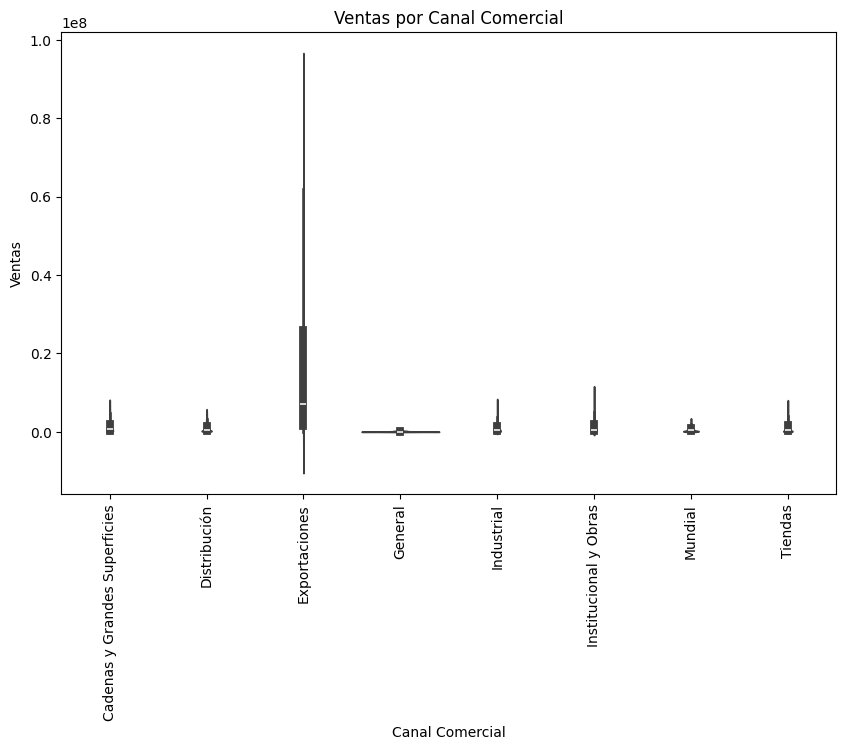

In [24]:
# Ventas por Canal Comercial
ventas_por_canal = df.groupby('Canal Comercial').apply(lambda x:remover_outliers(x,"Ventas")).reset_index(drop=True)

# Visualización de las ventas por Umes
plt.figure(figsize=(10, 6))
sns.violinplot(x='Canal Comercial', y='Ventas', data=ventas_por_canal)
plt.title('Ventas por Canal Comercial')
plt.xticks(rotation=90)
plt.show()

C:\Users\camil\AppData\Local\Temp\ipykernel_26952\2800045306.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ventas_por_uen = df.groupby('Uen').apply(lambda x:remover_outliers(x,"Ventas")).reset_index(drop=True)


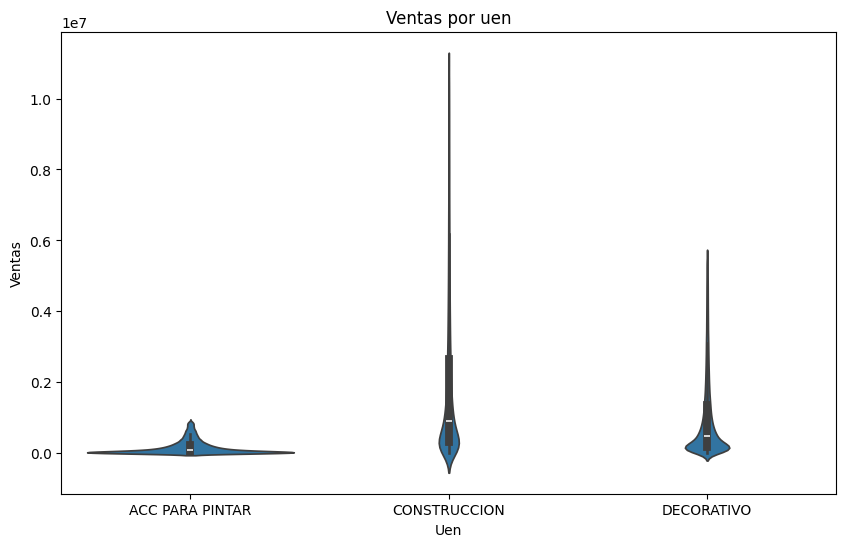

In [26]:
# Ventas por uen
ventas_por_uen = df.groupby('Uen').apply(lambda x:remover_outliers(x,"Ventas")).reset_index(drop=True)

# Visualización de las ventas por Uuen
plt.figure(figsize=(10, 6))
sns.violinplot(x='Uen', y='Ventas', data=ventas_por_uen)
plt.title('Ventas por uen')
plt.show()